# Backpropahgation from scratch

Link Refrensi: https://pyimagesearch.com/2021/05/06/backpropagation-from-scratch-with-python/

Import library numpy

In [ ]:
import numpy as np

print("Numpy version: ", np.__version__)

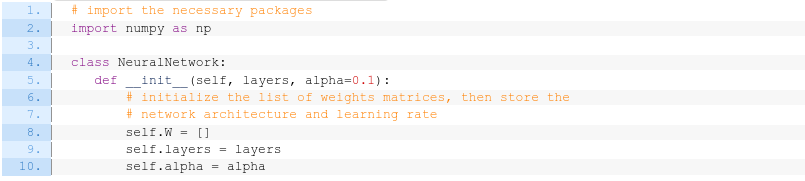

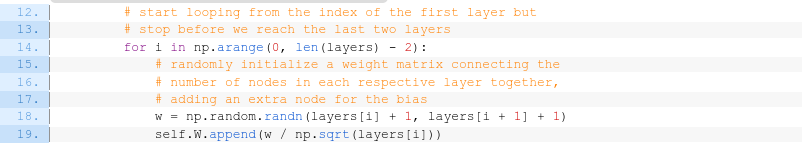

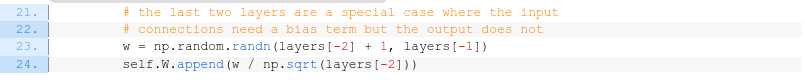

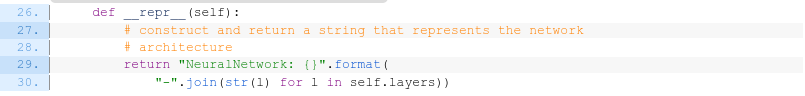

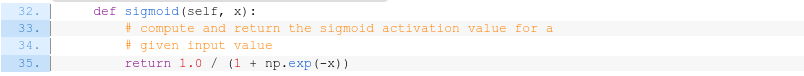

In [ ]:
import numpy as np

print("Numpy version: ", np.__version__)

class NeuralNetwork:
    def __init__(self, layers, alpha = 0.1):
        # Initialize the list of weitghts matrices, then store the
        # network architecture and learning rate
        self.W = []
        self.layers = layers
        self.alpha = alpha

        # start looping from the index of the first layer but
        # stop before we reach the last two layers
        for i in np.arange(0, len(layers) - 2):
            # randomly initialize a weight matrix connecting the
            # number of nodes in each respective layers together,
            # adding an extra node for the bias
            w = np.random.randn(layers[i] + 1, layers[i + 1] + 1)
            self.W.append(w / np.sqrt(layers[i]))
        
        # the last two layers are a special case where the input
        # connections need a bias term but the output does not
        w = np.random.randn(layers[-2] + 1, layers[-1])
        self.W.append(w / np.sqrt(layers[-2]))

    def __repr__(self):
        # construct and return a string that represents the network
        # architecture
        return "NeuralNetwork: {}".format("-".join(str(l) for l in self.layers))

    def sigmoid(self, x):
        # compute and return the sigmoid activation value for a
        # given input value
        return 1.0 / (1 + np.exp(-x))

    def sigmoid_deriv(self, x):
        # compute the derivative of the sigmoid function ASSUMING
        # that x has already been passed through the 'sigmoid'
        # function
        return x * (1 - x)

    def fit(self, X, y, epochs=1000, displayUpdate=100):
        # insert a column of 1's as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        X = np.c_[X, np.ones((X.shape[0]))]

        # loop over the desired number of epochs
        for epoch in np.arange(0, epochs):
            # loop over each individual data point and train
			      # our network on it
            for (x, target) in zip(X, y):
                self.fit_partial(x, target)

            # check to see if we should display a training update
            if epoch == 0 or (epoch + 1) % displayUpdate == 0:
                loss = self.calculate_loss(X, y)
                print("[INFO epoch={}, loss={:.7f}".format(epoch + 1, loss))

    def fit_partial(self, x, y):
        # construct our list of output activations for each layer
        # as our data point flows through the network; the first
        # activation is a special case -- it's just the input
        # feature vector itself
        A = [np.atleast_2d(x)]

        # FEEDFORWARD:
		    # loop over the layers in the network
        for layer in np.arange(0, len(self.W)):
            # feedforward the activation at the current layer by
            # taking the dot product between the activation and
            # the weight matrix -- this is called the "net input"
            # to the current layer
            net = A[layer].dot(self.W[layer])

            # computing the "net output" is simply applying our
			      # nonlinear activation function to the net input
            out = self.sigmoid(net)

            # once we have the net output, add it to our list of
			      # activations
            A.append(out)

        # BACKPROPAGATION
        # the first phase of backpropagation is to compute the
        # difference between our *prediction* (the final output
        # activation in the activations list) and the true target
        # value
        error = A[-1] - y

        # BACKPROPAGATION
        # the first phase of backpropagation is to compute the
        # difference between our *prediction* (the final output
        # activation in the activations list) and the true target
        # value
        D = [error * self.sigmoid_deriv(A[-1])]

        # once you understand the chain rule it becomes super easy
        # to implement with a 'for' loop -- simply loop over the
        # layers in reverse order (ignoring the last two since we
        # already have taken them into account)
        for layer in np.arange(len(A) - 2, 0, -1):
            # the delta for the current layer is equal to the delta
            # of the *previous layer* dotted with the weight matrix
            # of the current layer, followed by multiplying the delta
            # by the derivative of the nonlinear activation function
            # for the activations of the current layer
            delta = D[-1].dot(self.W[layer].T)
            delta = delta * self.sigmoid_deriv(A[layer])
            D.append(delta)

        # since we looped over our layers in reverse order we need to
		    # reverse the deltas
        D = D[::-1]

        # WEIGHT UPDATE PHASE
		    # loop over the layers
        for layer in np.arange(0, len(self.W)):
            # update our weights by taking the dot product of the layer
            # activations with their respective deltas, then multiplying
            # this value by some small learning rate and adding to our
            # weight matrix -- this is where the actual "learning" takes
            # place
            self.W[layer] += -self.alpha * A[layer].T.dot(D[layer])

    def predict(self, X, addBias=True):
        # initialize the output prediction as the input features -- this
        # value will be (forward) propagated through the network to
        # obtain the final prediction
        p = np.atleast_2d(X)

        # check to see if the bias column should be added
        if addBias:
            # insert a column of 1's as the last entry in the feature
			      # matrix (bias)
            p = np.c_[p, np.ones((p.shape[0]))]

        # loop over our layers in the network        
        for layer in np.arange(0, len(self.W)):
            # computing the output prediction is as simple as taking
            # the dot product between the current activation value 'p'
            # and the weight matrix associated with the current layer,
            # then passing this value through a nonlinear activation
            # function
            p = self.sigmoid(np.dot(p, self.W[layer]))

        # return the predicted value
        return p

    def calculate_loss(self, X, targets):
        # make predictions for the input data points then compute
		    # the loss
        targets = np.atleast_2d(targets)
        predictions = self.predict(X, addBias=False)
        loss = 0.5 * np.sum((predictions - targets) ** 2)

        # return the loss
        return loss

In [ ]:
# X = np.array([[0, 0, 0], [0, 1], [1, 0], [1, 1]])
# y = np.array([[0], [1], [1], [0]])

In [ ]:
"""
X = np.array ([[0.1614, 0.1394, 0.1171, 0.1070, 0.1342, 0.1738, 0.4204, 0.6896, 0.6363, 0.3657, 0.2266, 0.1678],  #pola 1
                         [0.1394, 0.1171, 0.1070, 0.1342, 0.1738, 0.4204, 0.6896, 0.6363, 0.3657, 0.2266, 0.1678, 0.1439],  #pola 2
                         [0.1171, 0.1070, 0.1342, 0.1738, 0.4204, 0.6896, 0.6363, 0.3657, 0.2266, 0.1678, 0.1439, 0.1249],  #pola 3
                         [0.1070, 0.1342, 0.1738, 0.4204, 0.6896, 0.6363, 0.3657, 0.2266, 0.1678, 0.1439, 0.1249, 0.1013],  #pola 4
                         [0.1342, 0.1738, 0.4204, 0.6896, 0.6363, 0.3657, 0.2266, 0.1678, 0.1439, 0.1249, 0.1013, 0.1],     #pola 5
                         [0.1738, 0.4204, 0.6896, 0.6363, 0.3657, 0.2266, 0.1678, 0.1439, 0.1249, 0.1013, 0.1,    0.1179],  #pola 6
                         [0.4204, 0.6896, 0.6363, 0.3657, 0.2266, 0.1678, 0.1439, 0.1249, 0.1013, 0.1,    0.1179, 0.3678],  #pola 7
                         [0.6896, 0.6363, 0.3657, 0.2266, 0.1678, 0.1439, 0.1249, 0.1013, 0.1,    0.1179, 0.3678, 0.4838],  #pola 8
                         [0.6363, 0.3657, 0.2266, 0.1678, 0.1439, 0.1249, 0.1013, 0.1,    0.1179, 0.3678, 0.4838, 0.9],     #pola 9
                         [0.3657, 0.2266, 0.1678, 0.1439, 0.1249, 0.1013, 0.1,    0.1179, 0.3678, 0.4838, 0.9,    0.7017],  #pola 10
                         [0.2266, 0.1678, 0.1439, 0.1249, 0.1013, 0.1,    0.1179, 0.3678, 0.4838, 0.9,    0.7017, 0.5189],  #pola 11
                         [0.1678, 0.1439, 0.1249, 0.1013, 0.1,    0.1179, 0.3678, 0.4838, 0.9,    0.7017, 0.5189, 0.2394]]) #pola 12
    
y = np.array ([[0.1439], [0.1249], [0.1013], [0.1], [0.1179], [0.3678], [0.4838], [0.9], [0.7017], [0.5189], [0.2394], [0.1837]])
"""

In [ ]:
X =  np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
y = np.array([[0.00], [1.00], [1.00], [1.00], [1.00], [1.00], [1.00], [0.00]])

In [ ]:
nn = NeuralNetwork([3, 2, 1], alpha=0.5)
nn.fit(X, y, epochs=100000)

In [ ]:
# now that our network is trained, loop over the XOR data points
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = nn.predict(x)[0][0]
    step = 1 if pred > 0.5 else 0
    print("[INFO] data={}, ground-truth={}, pred={:.4f}, step={}".format(
      x, target[0], pred, step))
    
print("\n", y)

# Test dengan MNIST dataset

In [ ]:
# import the necessary packages
# from pyimagesearch.nn import NeuralNetwork
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets

In [ ]:
# load the MNIST dataset and apply min/max scaling to scale the
# pixel intensity values to the range [0, 1] (each image is
# represented by an 8 x 8 = 64-dim feature vector)
print("[INFO] loading MNIST (sample) dataset...")
digits = datasets.load_digits()
data = digits.data.astype("float")
data = (data - data.min()) / (data.max() - data.min())
print("[INFO samples: {}, dim: {}".format(data.shape[0], data.shape[1]))

In [ ]:
# construct the training and testing splits
(trainX, testX, trainY, testY) = train_test_split(data, digits.target, test_size=0.25)

# convert the labels from integers to vectors
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

In [ ]:
# train the network
print("[INFO] training network...")
nn = NeuralNetwork([trainX.shape[1], 32, 16, 10])
print("[INFO] {}".format(nn))
nn.fit(trainX, trainY, epochs=1000)

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = nn.predict(testX)
predictions = predictions.argmax(axis=1)
print(classification_report(testY.argmax(axis=1), predictions))